##### INF8460 ‚Äì Traitement automatique de la langue naturelle - Automne 2024

## TP3: G√©n√©ration automatique de mots-cl√©s (concepts) avec une architecture Transformer


## Identification de l'√©quipe:

### Groupe de laboratoire: 01

### Equipe num√©ro : 04

### Membres:

- Gervais Presley Koyaweda 2305686 (1/3) : Encodeur, D√©codeur, Transformateur, Training. √âvaluations
- Lucie Legarez 2413157 (1/3) : Tokenization, Positional Embdedding, Attention, Encodeur, D√©codeur, Padding, Graphiques
- Ibrahima Ba 1943223 (1/3) : Encodeur, D√©codeur, Transformateur, Training, Commentaires

##### Le TP s'est fait de fa√ßon ind√©pendante avec comme objectif de comparer nos diff√©rents r√©sultats et de choisir les scipts les  plus simples et rapide √† chaque √©tape. Tous les membres de l'√©quipe ont travaill√© sur chacune des 3 parties et les efforts fournis ont √©t√© √©quitables.

* nature de la contribution: D√©crivez bri√®vement ce qui a √©t√© fait par chaque membre de l‚Äô√©quipe. Tous les membres sont cens√©s contribuer au d√©veloppement. Bien que chaque membre puisse effectuer diff√©rentes t√¢ches, vous devez vous efforcer d‚Äôobtenir une r√©partition √©gale du travail. Soyez pr√©cis ! N'indiquez pas seulement : travail r√©parti √©quitablement

## 1. Objectif du TP

Dans ce TP, vous allez devoir impl√©menter en `PyTorch` un mod√®le suivant l'architecture Transformer cr√©√©e initialement dans l'article "[Attention Is All You Need](https://arxiv.org/pdf/1706.03762)".
<br>
Votre t√¢che sera d'impl√©menter l'architecture du Transformer et d'entra√Æner un mod√®le de type Transformer √† g√©n√©rer les concepts cl√©s d'une phrase. Votre mod√®le prendra donc en entr√©e une phrase quelconque en anglais et produira en sortie une s√©quence de mots correspondant aux concepts les plus importants de la phrase. Par exemple :
<br>

**Entr√©e** : "The dog jumped over the fence." <br>
**Sortie attendue** : ['dog' 'jump' 'fence']

Cette t√¢che a d'ailleurs plusieurs applications dans le monde r√©el allant de la g√©n√©ration de r√©sum√©s jusqu'√† la cr√©ation de bases de connaissances √† partir d'un texte.


#### Requis et ressources utiles

Il est fortement conseill√© de s'√™tre familiaris√© avec la librairie `PyTorch` avant d'entamer le TP. Par exemple, vous devriez savoir comment fonctionne un objet de type `nn.Module` et ce que la fonction `forward` de cet objet fait. Plusieurs tutoriels sont disponibles sur internet expliquant clairement le fonctionnement de la librairie. Voici certaines ressources qui peuvent √™tre utiles :
- [Build The Neural Network](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html)
- [PyTorch Tutorial](https://github.com/yunjey/pytorch-tutorial?tab=readme-ov-file)


## 2. Jeu de donn√©es

Le jeu de donn√©es est compos√© de paires (phrase, concepts) o√π une phrase est mentionn√©e et la liste des concepts les plus importants de la phrase est indiqu√©e. Le jeu de donn√©es est divis√© en ensembles d'entra√Ænement, de validation et de test :
- Entra√Ænement : 4500 examples (train.csv)
- Validation : 500 examples (val.csv)
- Test : 500 examples (test.csv)

Pour une m√™me s√©quence de concepts, il y a 3 phrases pouvant √™tre associ√©es √† ces concepts. Par exemple, pour les concepts : ['cat' 'laptop' 'lie'], les phrases suivantes y sont associ√©es :
- A cat lying on a laptop
- A large cat lies down next to a laptop.
- There is a cat lying on top of the laptop.


## 3. LIBRAIRIES PERMISES
- Jupyter notebook
- PyTorch
- nltk
- transformers
- pandas
- matplotlib
- numpy
- Huggingface


Pour toute autre librairie, demandez √† votre charg√© de laboratoire

## 4. INFRASTRUCTURE

- Vous avez acc√®s aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)

## 5. √âTAPES DU TP

In [1]:
# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as O
from torch.utils.data import DataLoader

# ML
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import math
import numpy as np
import random

# System
from dataclasses import dataclass
import time
import re

# Huggingface
from tokenizers import CharBPETokenizer

Il vous faudra peut-√™tre t√©l√©charger ce module de `nltk`

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 1. Charger les donn√©es (2 points)

La premi√®re √©tape va √™tre de charger les donn√©es des fichiers d'entra√Ænement et d'√©valuation. Pour cela, nous allons utiliser la classe `Dataset` de `PyTorch`. Compl√©tez les fonctions de cette classe.

In [3]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, file_path: str = None, data: pd.DataFrame = None):

        if file_path is None and data is None:
            raise Exception('A file path or a dataframe must be passed to create a CustomDataset')

        if file_path != None:
            self.data = pd.read_csv(file_path)
        else:
            self.data = data.copy()

        # TODO : Enlever les donn√©es qui sont nulles et
        # assigner le r√©sultat dans la variable data
            self.data=self.data.dropna()
        # END TODO

    def __len__(self):
        # TODO : Retourne le nombre de donn√©es
        return len(self.data)
        # END TODO

    def __getitem__(self, idx: int):
        # TODO : Retourne l'√©l√©ment √† l'index "idx"
        return self.data.iloc[idx]
        # END TODO

    def get_column(self, column: str):
        # TODO : Retourne toutes les rang√©es de la colonne "column"
        return self.data[column]
        # END TODO

    def get_batch(self, idx: int, size):
        # TODO : Retourne toutes les rang√©es de l'index "idx" √† "idx" + "size"
        return self.data.iloc[idx:idx+size]
        # END TODO

    def transform(self, function):
        self.data = self.data.apply(function)

    def sample(self, nb_samples, random_state=42):
        return self.data.sample(n=nb_samples, random_state=random_state)

In [4]:
root = 'data/'

train_dataset = CustomDataset(root + 'train.csv')
test_dataset = CustomDataset(root + 'test.csv')
val_dataset = CustomDataset(root + 'val.csv')

INPUT_COLUMN = 'sentence'
OUTPUT_COLUMN = 'concepts'
MAX_LENGTH = 16
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu' # Vous pouvez changer sur quelle machine les calculs seront effectu√©s

In [5]:
print('Training set size : ', len(train_dataset))
print('Validation set size : ', len(val_dataset))
print('Testing set size : ', len(test_dataset))

Training set size :  4500
Validation set size :  500
Testing set size :  500


### 2. Statistiques (5 points)

Avant d'entamer la cr√©ation du mod√®le, il est important de se familiariser avec les donn√©es et d'√©valuer la taille des donn√©es avec lesquelles nous travaillons.

#### 2.1 Histogramme du nombre de caract√®res (2 points)

Compl√©tez la m√©thode `show_histogram_nb_characters` qui affiche un histogramme de la distribution du nombre de caract√®res des exemples de la colonne pass√©e en param√®tre. L'axe des abscisses devra repr√©senter le nombre de caract√®res et l'axe des ordonn√©es le nombre de documents. Utilisez des bacs (bins) de 20 pour l'histogramme. Affichez ensuite la distribution du nombre de caract√®res sur l'ensemble d'entra√Ænement pour la colonne 'sentence' et la colonne 'concepts'.

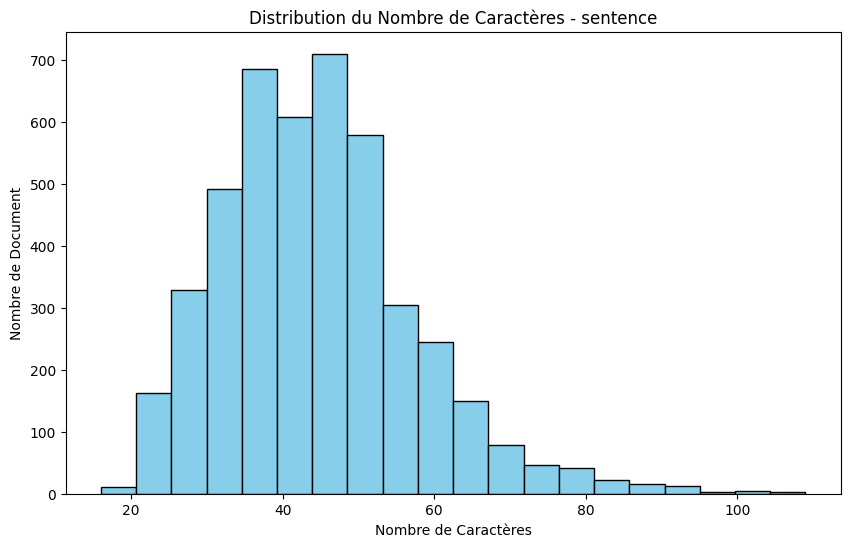

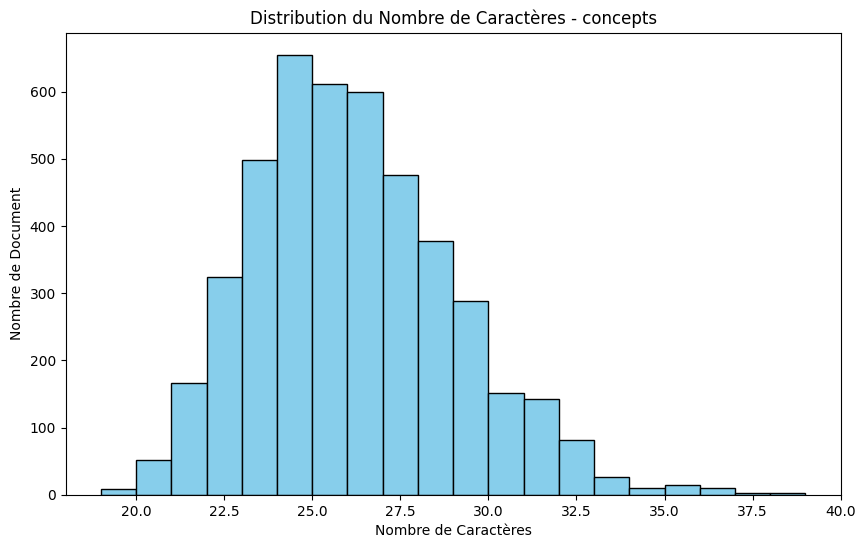

In [6]:
def show_histogram_nb_chararacters(dataset: CustomDataset, column: str):

    """
    Affiche la distribution de la colonne pass√© en param√®tre. L'histogramme doit contenir un titre et des titres sur les axes

    dataset: Dataset contenant plusieurs colonne dont la colonne dont les statistiques doivent √™tre affich√©es
    column: Colonne √† afficher

    """
    # TODO

    # Extraction du nombre de caract√®res dans chaque document de la colonne
    number_chars=dataset.get_column(column).apply(len)

    #Affichage de l'histogramme
    plt.figure(figsize=(10,6))
    plt.hist(number_chars,bins=20,color='skyblue',edgecolor="black")
    plt.title(f'Distribution du Nombre de Caract√®res - {column}')
    plt.xlabel('Nombre de Caract√®res')
    plt.ylabel('Nombre de Document')
    # END TODO


show_histogram_nb_chararacters(train_dataset, INPUT_COLUMN)
show_histogram_nb_chararacters(train_dataset, OUTPUT_COLUMN)

#### 2.2 Histogramme du nombre de mots par document (2 points)

De la m√™me mani√®re, compl√©tez la m√©thode `show_histogram_nb_words` qui affiche un histogramme de la distribution du nombre de mots des exemples de la colonne pass√©e en param√®tre. Utilisez des bacs (bins) de 20 pour l'histogramme. Affichez ensuite la distribution du nombre de mots sur l'ensemble d'entra√Ænement pour les colonnes "sentence" et "concepts". Dans le cas de la colonne 'concepts', assurez-vous que les '[', ']' et les apostrophes ne soient pas consid√©r√©es comme des mots.

Indice : Utilisez la m√©thode word_tokenize() de nltk.

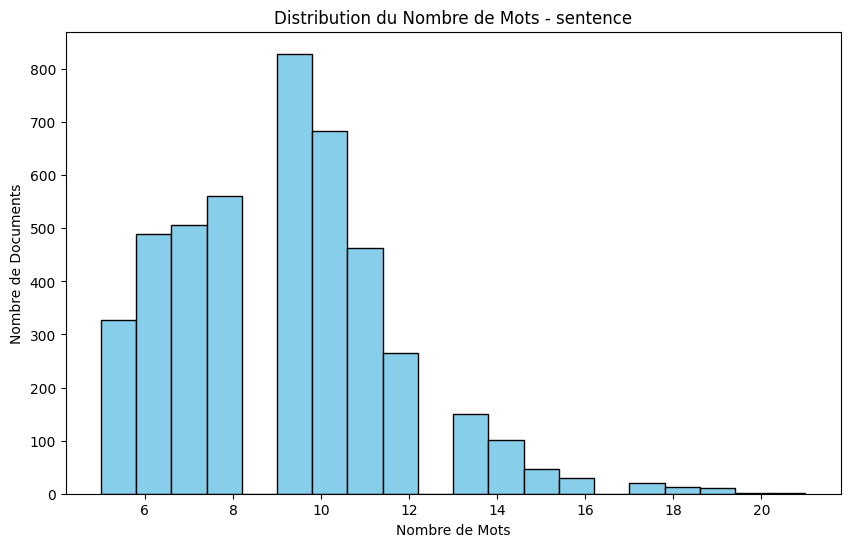

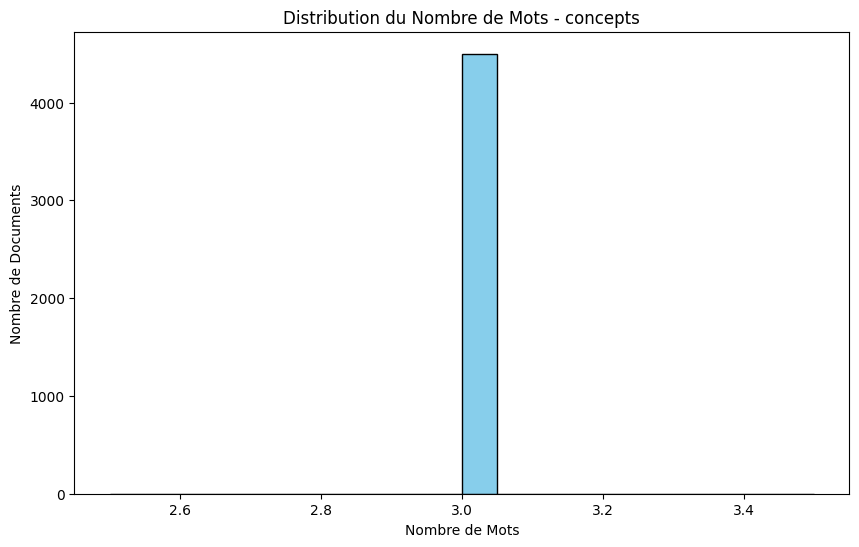

In [7]:
from nltk.tokenize import word_tokenize

def show_histogram_nb_words(dataset: CustomDataset, column: str):

    """
    Affiche la distribution de la colonne pass√© en param√®tre du dataset. L'histogramme doit contenir un titre et des titres sur les axes

    dataset: Dataset contenant plusieurs colonne dont la colonne dont les statistiques doivent √™tre affich√©es
    column: Colonne √† afficher

    """
    # TODO

    # Traitement sp√©cifique pour la colonne 'concepts' pour enlever les caract√®res [, ], et '
    if column=='concepts':
      data_cleaned=dataset.get_column(column).apply(lambda x: re.sub(r"[\[\]',]", "", x))
    else:
      data_cleaned=dataset.get_column(column)

    # Calcul du nombre de mots dans chaque document de la colonne
    number_words=data_cleaned.apply(lambda x:len(word_tokenize(x)))

    # Affichage de l'histogramme avec des bacs de 20
    plt.figure(figsize=(10, 6))
    plt.hist(number_words, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution du Nombre de Mots - {column}')
    plt.xlabel('Nombre de Mots')
    plt.ylabel('Nombre de Documents')
    plt.show()


    # END TODO

show_histogram_nb_words(train_dataset, INPUT_COLUMN)
show_histogram_nb_words(train_dataset, OUTPUT_COLUMN)

#### 2.3 Commentez les graphiques (1 points)
1. Est-ce que les distributions suivent des distributions normales ?
2. Qu'observez-vous de sp√©cial sur la distribution du nombre de mots de la colonne "concepts" ? Pourquoi est-elle ainsi ?

### Analyse des distributions

1. **Est-ce que les distributions suivent des distributions normales ?**
   - La distribution du nombre de caract√®res et du nombre de mots dans la colonne "sentence" est proche d'une distribution normale mais l√©g√®rement asym√©trique. Elle pr√©sente une concentration autour d'une valeur centrale avec une baisse progressive des fr√©quences de part et d'autre. Cependant, elle n'est pas parfaitement sym√©trique.
   - La distribution pour la colonne "concepts", en revanche, ne suit pas du tout une distribution normale. Elle est extr√™mement concentr√©e autour d'une seule valeur, ce qui en fait une distribution atypique.

2. **Qu'observez-vous de sp√©cial sur la distribution du nombre de mots de la colonne "concepts" ?**
   - La distribution du nombre de mots pour la colonne "concepts" montre une concentration unique autour de trois mots. Cette absence de variabilit√© est inhabituelle et contraste avec les autres distributions observ√©es.

3. **Pourquoi est-elle ainsi ?**
   - Cette concentration autour de trois mots s'explique probablement par la structure des donn√©es : chaque entr√©e dans la colonne "sentence" est repr√©sent√©e de mani√®re uniforme avec trois mots ou termes-cl√©s dans la colonne "concepts". Cela pourrait √™tre d√ª √† une standardisation dans l'ensemble de donn√©es o√π chaque concept est toujours d√©crit avec le m√™me nombre de mots, d'o√π cette absence de variation.


### 3. Segmentation (Tokenization) (5 points)

#### 3.1 Entra√Ænement du segmenteur (tokenizer) (3 points)
La fonction `word_tokenize()` de `nltk` est utile pour rapidement ressortir des statistiques, mais elle reste tr√®s g√©n√©rale et inefficace. Afin de r√©duire le plus possible la taille du vocabulaire, nous allons entra√Æner notre propre Tokenizer en nous basant sur l'algorithme BPE (Byte Pair Encoding). L'algorithme BPE est une m√©thode de compression de texte qui permet de cr√©er des tokenizers efficaces en regroupant les caract√®res les plus fr√©quents. Il commence par diviser le texte en caract√®res uniques, puis it√©rativement fusionne les paires de caract√®res les plus fr√©quentes en nouveaux symboles. Ce processus continue jusqu'√† atteindre un nombre pr√©d√©fini de jetons (tokens), permettant ainsi de g√©rer des vocabulaires de diff√©rentes tailles de mani√®re flexible et efficace. √Ä l'aide de BPE, nous allons transformer les mots en nombres pour pouvoir les passer au Transformer par la suite. Chaque jeton (token) sera associ√© √† un nombre correspondant √† l'indice du jeton dans le vocabulaire. Une s√©quence en entr√©e sera ainsi repr√©sent√©e comme une s√©quence de nombres.

De plus, des jetons sp√©ciaux seront ajout√©s au tokenizer pour sp√©cifier le d√©but d'une phrase (begin-of-sequence : `[BOS]`) et la fin d'une phrase (end-of-sequence : `[EOS]`). Un jeton de padding `[PAD]` sera utilis√© afin de s'assurer que toutes les phrases ont la m√™me taille. Finalement, un jeton `[UNK]` sera utilis√© pour les jetons inconnus.

Pour cr√©er ce vocabulaire √† l'aide de l'algorithme BPE, il faudra entra√Æner le tokenizer sur notre ensemble d'entra√Ænement pour qu'il puisse encoder efficacement les mots qui y sont pr√©sents. L'entra√Ænement est d√©j√† impl√©ment√© par la classe `ByteLevelBPYTokenizer` de la librairie `tokenizers`.

Vous n'avez qu'√† compl√©ter la fonction :
- `data_generator` qui retourne un g√©n√©rateur d'un lot (batch) de texte provenant de l'ensemble d'entra√Ænement. Pour chaque lot, les colonnes "sentence" et "concepts" sont concat√©n√©es pour former la cha√Æne finale qui sera envoy√©e au tokenizer. Les lots sont utiles lors de l'entra√Ænement pour acc√©l√©rer l'entra√Ænement en parall√©lisant le tout et en √©vitant de charger tout notre ensemble d'entra√Ænement en m√©moire directement.

In [8]:
VOCAB_SIZE = 8000
special_tokens = ['[PAD]', '[BOS]', '[EOS]', '[UNK]']
base_tokenizer = CharBPETokenizer(unk_token=special_tokens[-1])
tokenizer_batch_size = 64

def data_generator():
    """
    Generateur qui retourne un lot (batch) de texte provenant de l'ensemble d'entra√Ænement.
    Pour chaque √©l√©ment d'un lot, les colonnes "target" et "concepts" sont concat√©n√©e.
    """
    for i in range(0, len(train_dataset), tokenizer_batch_size):

        # TODO

        # R√©cup√©ration du lot courant
        batch = train_dataset.get_batch(i, i+tokenizer_batch_size)

        # Concat√©nation des colonnes "sentence" et "concepts" pour chaque ligne du lot
        text = batch['sentence'] + batch['concepts']  # Mettez le lot dans la variable text

        # END TODO

        yield text


Vous devez maintenant compl√©ter la fonction :
- `train_tokenizer` qui prend en param√®tre un tokenizer pour entra√Æner ce dernier √† l'aide de la fonction [train_from_iterator](https://github.com/huggingface/tokenizers/blob/main/bindings/python/py_src/tokenizers/implementations/byte_level_bpe.py). Le g√©n√©rateur de donn√©es (data_generator) est envoy√© √† la fonction train_from_iterator tout comme la taille du vocabulaire, les jetons sp√©ciaux et la fr√©quence minimum d'une s√©quence pour la consid√©rer comme un jeton. Indiquez explicitement une fr√©quence minimum de 2.

In [9]:

from tokenizers import AddedToken, Tokenizer, decoders, pre_tokenizers, processors, trainers

def train_tokenizer(tokenizer: CharBPETokenizer):
    """
    Entra√Æne le tokenizer pass√© en param√®tre en appelant la fonction train_from_iterator
    et en sp√©cifiant le g√©n√©rateur de donn√©e (data_generator), la taille du vocabulaire,
    les jetons sp√©ciaux et une fr√©quence minimum de 2 (indiquez le explicitement)
    """
    # TODO

    # Appel de train_from_iterator avec les bons param√®tres
    tokenizer.train_from_iterator(
        iterator=data_generator(),
        vocab_size=VOCAB_SIZE,
        special_tokens=special_tokens,
        min_frequency=2
    )


    # END TODO

train_tokenizer(base_tokenizer)

# On ajoute les jetons de d√©but, de fin de phrase et de jeton inconnu
bos_token_id = base_tokenizer.token_to_id("[BOS]")
eos_token_id = base_tokenizer.token_to_id("[EOS]")
unk_token_id = base_tokenizer.token_to_id("[UNK]")

# On applique un template au tokenizer pour qu'il ajoute
# les jetons au d√©but et √† la fin de chaque phrase
base_tokenizer.post_processor = processors.TemplateProcessing(
    single=f"[BOS]:0 $A:0 [EOS]:0",
    special_tokens=[
        ("[BOS]", bos_token_id),
        ("[EOS]", eos_token_id),
    ],
)


Nous allons maintenant transformer notre tokenizer pour qu'il soit compatible avec l'API de la librairie Huggingface. Cela permettra entre autre de faciliter les appels de m√©thodes pour modifier facilement nos entr√©es. Par exemple, avec l'API de Huggingface, nous pouvons simplement appeler la m√©thode `tokenize` pour diviser une s√©quence en jetons (`Welcome` -> `[W, el, come]`). De la m√™me mani√®re, l'API nous permet d'appeler les m√©thodes `encode` et `decode` pour transformer une cha√Æne de caract√®res en s√©quences d'indices de jetons (`Welcome` -> `[36, 170, 664]`) et inversement.

In [10]:
from transformers import PreTrainedTokenizerFast

tokenizer = PreTrainedTokenizerFast(tokenizer_object=base_tokenizer._tokenizer, truncation=True)
tokenizer.add_special_tokens({
    'pad_token': "[PAD]",
    'bos_token': "[BOS]",
    'eos_token': "[EOS]",
    'unk_token': "[UNK]"
});

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Testons maintenant notre tokenizer sur une phrase de test

In [11]:
test_input = 'Welcome ! The boat arrived at the station ! ü§ó '
print(test_input, '\n')
print(tokenizer.tokenize(test_input))

Welcome ! The boat arrived at the station ! ü§ó  

['W', 'el', 'come</w>', '!</w>', 'The</w>', 'boat</w>', 'arrived</w>', 'at</w>', 'the</w>', 'station</w>', '!</w>', '[UNK]']


Observons maintenant la m√™me phrase, mais une fois encod√©e en nombre. D√©codons-la ensuite √† partir de sa version encod√©e pour voir si nous retrouvons la phrase initiale.

- La m√©thode `encode` permet de transformer une s√©quence de mots en s√©quence de nombres correspondant aux indices des diff√©rents jetons de la phrase dans le vocabulaire
- La m√©thode `decode` permet de transformer une s√©quence d'indices de jetons en phrase lisible.

In [12]:
print('Texte initial : ', test_input)
print('=' * 100)
print('Texte encod√© : ', tokenizer.encode(test_input))
print('Texte d√©cod√© : ', tokenizer.decode(tokenizer.encode(test_input)))

Texte initial :  Welcome ! The boat arrived at the station ! ü§ó 
Texte encod√© :  [1, 36, 168, 807, 98, 277, 295, 2875, 129, 118, 350, 98, 3, 2]
Texte d√©cod√© :  [BOS]Welcome! The boat arrived at the station! [UNK][EOS]


#### 3.2 Que remarquez-vous dans la version segment√©e (tokenized) de la phrase de test ? Quelles sont les diff√©rences entre la phrase initiale et la phrase d√©cod√©e ? Pourquoi ? (2 points)

### Observations et Explications

1. **Version segment√©e (tokenized)** :
   - La phrase est segment√©e en sous-unit√©s avec des indications `</w>` pour marquer la fin des mots, r√©sultat de l'algorithme Byte Pair Encoding (BPE) qui r√©duit la taille du vocabulaire en utilisant des sous-unit√©s fr√©quentes.

2. **Diff√©rences entre la phrase initiale et la phrase d√©cod√©e** :
   - Des jetons sp√©ciaux `[BOS]` et `[EOS]` sont ajout√©s au d√©but et √† la fin de la phrase d√©cod√©e pour indiquer les limites de la s√©quence.
   - Le jeton `[UNK]` appara√Æt √† la place de l'emoji "ü§ó", signifiant que l'emoji n'est pas dans le vocabulaire et est donc remplac√© par le jeton inconnu `[UNK]`.

3. **Pourquoi ces diff√©rences ?** :
   - Les jetons `[BOS]` et `[EOS]` sont ajout√©s pour d√©limiter les phrases dans les mod√®les de traitement de texte.
   - Le jeton `[UNK]` est utilis√© pour les caract√®res non reconnus, comme l'emoji, car ils n'ont pas √©t√© inclus dans le vocabulaire entra√Æn√©.


### 4. Transformer (28 points)

Il est maintenant le temps de construire les couches du Transformer. Son architecture globale est pr√©sent√©e dans la figure suivante. :

![Transformer](images/transformer.png)

Les couches sont d√©finies pour vous et vous n'avez qu'√† compl√©ter, √† moins d'indication contraire, la fonction `forward` de chacune des classes qui prend un tenseur en entr√©e et effectue une transformation sur celui-ci pour g√©n√©rer une sortie. Cette transformation varie en fonction de chaque classe. Une description de ce que doit faire la classe est indiqu√©e √† chaque √©tape. Lorsque la fonction `forward` est complexe, une figure est fournie pour vous guider. Attention, ne changez pas le constructeur ou le nom de la classe !

#### 4.1 Positional Embedding
Le Transformer encode l'information de l'ordre des mots dans les plongements des mots. Des plongements de position sont calcul√©s et ils sont ajout√©s aux plongements de contexte. Dans ce cas-ci la classe `PositionalEmbedding` vous est donn√©e.

In [13]:
class PositionalEmbedding(nn.Module):
    """
    Cette classe a √©t√© prise de l'impl√©mentation originale du papier 'Attention Is All You Need'
    """

    def __init__(self, max_seq_length, embedding_dim):
        super(PositionalEmbedding, self).__init__()

        self.max_seq_length = max_seq_length
        self.embedding_dim = embedding_dim

        pe = torch.zeros(max_seq_length, self.embedding_dim)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, self.embedding_dim, 2).float() * -(math.log(10000.0) / self.embedding_dim))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x: torch.Tensor):
        return x + self.pe[:, :x.size(1)]


#### 4.2 Attention (6 points)
Le m√©canisme d'attention est le coeur de l'architecture du Transformer. Il permet notamment la parall√©lisation de l'entra√Ænement tout en garantissant un lien direct entre tous les jetons. Vous devrez impl√©menter la fonction `scaled_dot_product_attention` qui effectue le calcul principal derri√®re le m√©canisme d'attention. Cette fonction prend en entr√©e les tenseurs `Q`, `K`, `V` et effectue le calcul suivant :
$$A = \texttt{softmax}\Big( \frac{Q K^T \odot M}{\texttt{head\_dim}} \Big) V$$
o√π $M$ est le masque d'attention qui doit √™tre appliqu√©. Plus de d√©tails sont indiqu√©s dans la description de la fonction √† propos du masque. Par rapport au tenseur de cl√©s, vous remarquerez dans la formule qu'une transpos√©e est appliqu√©e sur ce tenseur. √âtant donn√© qu'un tenseur poss√®de plus que 2 dimensions, il est important de sp√©cifier quelles dimensions seront transpos√©es dans le tenseur. Dans notre cas, il s'agit des dimensions correspondants aux jetons de la s√©quence et aux plongements des jetons

In [14]:
class MultiHeadAttention(nn.Module):
    def __init__(self, model_dim, num_heads):
        super(MultiHeadAttention, self).__init__()
        assert model_dim % num_heads == 0, "La dimension du mod√®le doit √™tre divisible par le nombre de t√™tes d'attention"

        self.model_dim = model_dim
        self.num_heads = num_heads
        self.head_dim = model_dim // num_heads

        self.wq = nn.Linear(model_dim, model_dim) # Query
        self.wk = nn.Linear(model_dim, model_dim) # Key
        self.wv = nn.Linear(model_dim, model_dim) # Value
        self.wo = nn.Linear(model_dim, model_dim) # Output

        self.mask_value = -1e9

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        """
        Calcule les plongements d'attention en utilisant la formule

        attn = softmax(Q * K^T @ mask / head_dim) * V

        Args :
            Q : plongements des queries
            Taille : [batch_size, num_heads, seq_length, head_dim]

            K : plongements des keys
            Taille : [batch_size, num_heads, seq_length, head_dim]

            V : plongement des values
            Taille : [batch_size, num_heads, seq_length, head_dim]

            mask : Masque d'attention qui doit √™tre appliqu√© avant le softmax pour que
            les jetons ne portent pas leur attention sur certains jetons. Le masque est
            notamment utilis√© dans le d√©codeur pour s'assurer que le transformer n'ait
            pas acc√®s aux futurs jetons lorsqu'il essaie de pr√©dire le prochain jeton.
            Il contient des valeurs 0 ou 1. Une valeur de 0 √† la position i,j indique
            que pour le jeton i, le jeton j doit √™tre masqu√©. Pour masquer la valeur,
            il suffit de mettre une valeur tr√®s petite (self.mask_value) √† l'indice i,j.
            La fonction masked_fill de PyTorch pourrait √™tre utile
            Taille : [1, seq_length, seq_length]

        Returns :
        R√©sultat du calcul d'attention de taille [batch_size, num_heads, seq_length, head_dim]
        """
        # TODO

        #Calcul du score d'attention Q*k^T
        attn_scores=torch.matmul(Q,K.transpose(-2,-1))/(self.head_dim**0.5)

        #Application du masque
        attn_scores=attn_scores.masked_fill(mask==0, self.mask_value)

        #Application de softmax pour l'obtention des poids d'attention
        attn_weights=F.softmax(attn_scores, dim=-1)

        # Calcul du r√©sultat d'attention
        attn_output=torch.matmul(attn_weights,V)

        return attn_output
        # END TODO

    def split_heads(self, x):
        """
        S√©pare une entr√©e sur plusieurs t√™tes d'attention

        Args :
            x : Tenseur d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

        Returns :
        Tenseur s√©par√© sur plusieurs t√™tes d'attention
        Taille : [batch_size, num_heads, seq_length, head_dim]
        """
        return x.view(x.shape[0], x.shape[1], self.num_heads, self.head_dim).transpose(1, 2)

    def combine_heads(self, x):
        """
        Combine une entr√©e √† travers les t√™tes d'attention

        Args :
            x : Tenseur d'entr√©e
            Taille : [batch_size, num_heads, seq_length, head_dim]

        Returns :
        Tenseur s√©par√© sur plusieurs t√™tes d'attention
        Taille : [batch_size, seq_length, model_dim]
        """
        return x.transpose(1, 2).contiguous().view(x.shape[0], x.shape[2], self.model_dim)

    def forward(self, queries, keys, values, mask=None):
        """
        Ex√©cute le m√©canisme d'attention √† travers plusieurs t√™tes
        d'attention

        Args :
            queries : plongements des queries
            Taille : [batch_size, seq_length, model_dim]

            keys : plongements des keys
            Taille : [batch_size, seq_length, model_dim]

            values : plongement des values
            Taille : [batch_size, seq_length, model_dim]

            mask : mask qui sera appliqu√©
            Taille : [1, seq_length, seq_length]

        Returns :
        Tenseur contenant les plongements finaux de chaque indice de
        la s√©quence
        Taille : [batch_size, seq_length, model_dim]
        """
        Q = self.split_heads(self.wq(queries))
        K = self.split_heads(self.wk(keys))
        V = self.split_heads(self.wv(values))

        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)
        return self.wo(self.combine_heads(attn_output))

In [15]:
def test_attention():
    batch_size = 1
    seq_length = 4
    model_dim = 6
    num_heads = 2

    torch.random.manual_seed(42)
    attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
    inputs = torch.randint(0, 10, (batch_size, seq_length, model_dim), dtype=torch.float32)
    mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1))
    print(attention.forward(inputs, inputs, inputs, mask=mask).detach())

test_attention()

tensor([[[-0.6789,  2.8487,  2.8666, -1.1983,  3.2915,  0.5359],
         [-0.3437,  3.1045,  3.0715, -1.1405,  3.2748,  0.3843],
         [-2.5825,  4.2728, -0.0114, -2.2663, -0.0922, -2.4731],
         [-2.5749,  4.2706, -0.0056, -2.2613, -0.0874, -2.4694]]])


Sortie attendue :
```
tensor([[[-0.6789,  2.8487,  2.8666, -1.1983,  3.2915,  0.5359],
         [-0.3437,  3.1045,  3.0715, -1.1405,  3.2748,  0.3843],
         [-2.5825,  4.2728, -0.0114, -2.2663, -0.0922, -2.4731],
         [-2.5749,  4.2706, -0.0056, -2.2613, -0.0874, -2.4694]]])
```

#### 4.3 Encodeur (6 points)
L'encodeur du Transformer encode la s√©quence d'entr√©e dans des vecteurs de contexte avant d'envoyer ces vecteurs de contexte au d√©codeur pour qu'ils puissent √™tre utilis√©s pour g√©n√©rer la s√©quence de sortie. Vous n'avez qu'√† compl√©ter les fonctions `forward` des classes `TransformerFeedForward`, `EncoderLayer` et `Encoder`. L'architecture d'une couche d'encodeur `EncoderLayer` est d√©crite dans la figure suivante :

![EncoderLayer](images/encoder_layer.png)

La classe `TransformerFeedForward` repr√©sente une couche simple de r√©seaux de neurones avec la fonction d'activation `ReLU` qui sera pr√©sente dans l'encodeur. Son architecture est d√©crite dans la figure suivante :

![TransformerFeedForward](images/transformer_feed_forward.png)

In [16]:
class TransformerFeedForward(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int) -> None:
        super(TransformerFeedForward, self).__init__()
        self.model_dim = model_dim
        self.ff_dim = ff_dim

        self.ff1 = nn.Linear(model_dim, ff_dim)
        self.ff2 = nn.Linear(ff_dim, model_dim)

    def forward(self, x: torch.Tensor):
        """
        Applique les deux couches lin√©aires (ff) cons√©cutivement avec la fonction
        d'activation ReLU apr√®s chaque couche lin√©aire

        Args :
            x : Tenseur d'entr√©e de taille [batch_size, model_dim]

        Returns :
        Tenseur apr√®s √™tre pass√© √† travers les couches lin√©aires de taille
        [batch_size, model_dim]
        """
        # TODO

        # Premi√®re couche lin√©aire suivie de ReLU
        x=F.relu(self.ff1(x))

        # Deuxi√®me couche lin√©aire
        x=self.ff2(x)

        return x


        # END TODO

La classe `EncoderLayer` repr√©sente une seule couche qui applique le m√©canisme d'attention sur la sortie de la couche pr√©c√©dente. Dans le cas de la premi√®re couche d'encodeur, il s'agit simplement de la couche de plongements des jetons. Par la suite, le r√©sultat du m√©canisme d'attention est normalis√© et envoy√© √† une couche de r√©seau de neurones.

In [17]:
class EncoderLayer(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(EncoderLayer, self).__init__()

        self.self_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
        self.feed_forward = TransformerFeedForward(model_dim=model_dim, ff_dim=ff_dim)
        self.attention_layer_norm = nn.LayerNorm(model_dim)
        self.ff_layer_norm = nn.LayerNorm(model_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x: torch.Tensor, encoder_mask: torch.Tensor = None):
        """
        Applique la couche d'attention, de normalisation et de r√©seau de neurones
        sur l'entr√©e

        Args :
            x : Tenseur d'entr√©e de l'encodeur correspondant √† la s√©quence d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches de taille [batch_size, seq_length,
        model_dim]
        """
        # TODO

        # 1. Attention multi-t√™tes avec masque optionnel
        attn_output = self.self_attention(x, x, x, mask=encoder_mask)
        attn_output = self.dropout(attn_output)  # Application du dropout
        # Ajout de r√©sidu et normalisation
        out1 = self.attention_layer_norm(x + attn_output)

        # 2. R√©seau feed-forward
        ff_output = self.feed_forward(out1)
        ff_output = self.dropout(ff_output)  # Application du dropout
        # Ajout de r√©sidu et normalisation
        out2 = self.ff_layer_norm(out1 + ff_output)

        return out2

        # END TODO

La classe `Encoder` correspond √† une suite de plusieurs couches d'encodeurs. La fonction `forward` de cette classe doit appeler chacune des couches (`EncoderLayer`) une √† la suite de l'autre en passant √† la couche courante la sortie de la couche pr√©c√©dente. Le masque est partag√© entre toutes les couches `EncoderLayer`.

In [18]:
class Encoder(nn.Module):

    def __init__(self, num_layers: int, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(Encoder, self).__init__()

        self.layers = nn.ModuleList(
            [EncoderLayer(
                model_dim=model_dim,
                ff_dim=ff_dim,
                dropout_rate=dropout_rate,
                num_heads=num_heads,
            ) for _ in range(num_layers)]
        )

    def forward(self, x: torch.Tensor, encoder_mask: torch.LongTensor = None):
        """
        Applique toutes les couches d'encodeur cons√©cutivement

        Args :
            x : Tenseur d'entr√©e de l'encodeur correspondant √† la s√©quence d'entr√©e
            Taille : [batch_size, seq_length, model_dim]

            encoder_mask : Tenseur contenant le masque qui sera utilis√© par l'encodeur
            pour cacher certains jetons (notamment les jetons [PAD])
        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches dans l'encodeur de taille
        [batch_size, seq_length, model_dim]
        """
        # TODO
        for layer in self.layers:
          x=layer(x,encoder_mask)
        return x
        # END TODO

#### 4.4 D√©codeur (8 points)
Le d√©codeur est la partie du Transformer qui g√©n√®re la s√©quence de sortie en prenant le contexte de la s√©quence d'entr√©e et les jetons qui ont √©t√© g√©n√©r√©s pr√©c√©demment. De la m√™me mani√®re que l'encodeur, la classe `DecoderLayer` repr√©sente une seule couche de d√©codeur. L'architecture du `DecoderLayer` est pr√©sent√©e dans la figure suivante :

![DecoderLayer](images/decoder_layer.png)

In [19]:
class DecoderLayer(nn.Module):

    def __init__(self, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(DecoderLayer, self).__init__()

        self.self_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)
        self.cross_attention = MultiHeadAttention(model_dim=model_dim, num_heads=num_heads)

        self.feed_forward = TransformerFeedForward(model_dim=model_dim, ff_dim=ff_dim)

        self.self_attention_layer_norm = nn.LayerNorm(model_dim)
        self.cross_attention_layer_norm = nn.LayerNorm(model_dim)
        self.ff_layer_norm = nn.LayerNorm(model_dim)

        self.dropout = nn.Dropout(dropout_rate)

    def forward(self,
                x: torch.Tensor,
                encoder_out: torch.Tensor,
                encoder_mask: torch.LongTensor = None,
                decoder_mask: torch.LongTensor = None):
        """
        Applique les couches d'attention, de normalisation et de r√©seau de neurones
        sur l'entr√©e

        Args :
            x : Entr√©e du d√©codeur correspondant √† la s√©quence de sortie d√©cal√©e vers
            la droite
            Taille : [batch_size, seq_length, model_dim]

            encoder_output : Sortie de l'encodeur utilis√© pour la couche de cross-
            attention
            Taille : [batch_size, seq_length, model_dim]

            encoder_mask : Masque qui cache certains jetons dans la s√©quence d'entr√©e.
            Par exemple, les jetons [PAD] seront cach√©s puisqu'ils ne sont utilis√©s que
            pour aggrandir les s√©quences jusqu'√† la fen√™tre de contexte du Transformer
            Taille : [batch_size, seq_length, seq_length]

            decoder_mask : Masque qui cache certains jetons dans la s√©quence de sortie.
            Ce masque est notamment utilis√© dans le d√©codeur pour s'assurer que le
            transformer n'ait pas acc√®s aux futurs jetons lorsqu'il essaie de pr√©dire
            le prochain jeton.
            Taille : [batch_size, seq_length, seq_length]
        """
        # TODO

        # 1. Attention masqu√©e (self-attention)
        self_attn_out=self.self_attention(x,x,x,mask=decoder_mask)
        self_attn_out=self.dropout(self_attn_out)
        self_attn_out=self.self_attention_layer_norm(x+self_attn_out)

        # 2. Attention crois√©e (cross-attention) entre la sortie de l'encodeur et du d√©codeur
        cross_attn_out = self.cross_attention(self_attn_out, encoder_out, encoder_out, mask=encoder_mask)
        cross_attn_out = self.dropout(cross_attn_out)
        cross_attn_out = self.cross_attention_layer_norm(self_attn_out + cross_attn_out)

        # 3. R√©seau de neurones feed-forward
        ff_out = self.feed_forward(cross_attn_out)
        ff_out = self.dropout(ff_out)
        ff_out = self.ff_layer_norm(cross_attn_out + ff_out)

        return ff_out

        # END TODO

La classe `Decoder` repr√©sente toutes les couches du d√©codeur. La fonction `forward` de cette classe doit appeler chacune des couches (`DecoderLayer`) une √† la suite de l'autre en passant √† la couche courante la sortie de la couche pr√©c√©dente. Les attributs `encoder_out`, `encoder_mask` et `decoder_mask` sont partag√©s entre toutes les couches `DecoderLayer`.

In [20]:
class Decoder(nn.Module):

    def __init__(self, num_layers: int, model_dim: int, ff_dim: int, dropout_rate: int = 0.3, num_heads=8) -> None:
        super(Decoder, self).__init__()

        self.layers = nn.ModuleList(
            [DecoderLayer(
                model_dim=model_dim,
                ff_dim=ff_dim,
                dropout_rate=dropout_rate,
                num_heads=num_heads,
            ) for _ in range(num_layers)]
        )

    def forward(self, x: torch.Tensor, encoder_out: torch.Tensor, encoder_mask: torch.LongTensor = None, decoder_mask: torch.LongTensor = None):
        """
        Applique toutes les couches du d√©codeur cons√©cutivement

        Args :
            x : Tenseur d'entr√©e du d√©codeur correspondant √† la s√©quence de sortie
            Taille : [batch_size, seq_length, model_dim]

            encoder_out : Tenseur contenant la s√©quence d'entr√©e encod√©e par l'encodeur

            encoder_mask : Tenseur contenant le masque qui sera utilis√© par l'encodeur
            pour cacher certains jetons (notamment les jetons [PAD])

            decoder_mask : Tenseur contenant le masque qui sera utilis√© par le d√©codeur
            pour cacher certains jetons (notamment les jetons [PAD] et les jetons futurs)

        Returns :
        Tenseur apr√®s avoir appliqu√©s les couches dans l'encodeur de taille
        [batch_size, seq_length, model_dim]
        """
        # TODO

        # Passage l'entr√©e √† travers chaque couche de DecoderLayer
        for layer in self.layers:
            x = layer(x, encoder_out, encoder_mask, decoder_mask)

        return x

        # END TODO

#### 4.5 Transformer (8 points)

L'architecture du Transformer est maintenant pr√™te √† √™tre assembl√©e. En utilisant les diff√©rentes couches que vous avez impl√©ment√©es, compl√©tez la fonction `forward` de la classe `Transformer` qui, √† partir de l'entr√©e de l'encodeur et du d√©codeur, g√©n√®re la sortie du d√©codeur. L'architecture, telle que pr√©sent√©e pr√©c√©demment, correspond √† la figure suivante :

![Transformer](images/transformer.png)

La fonction forward doit passer les entr√©es √† l'encodeur et au d√©codeur pour pouvoir g√©n√©rer une pr√©diction en fonction d'une entr√©e en appliquant les bons masques et encodages de position.

In [21]:
@dataclass
class TransformerConfig:

    model_dim: int = 512
    ff_dim: int = 2048

    nb_encoder: int = 6
    nb_decoder: int = 6

    num_heads: int = 8

    max_seq_length: int = MAX_LENGTH
    vocab_size: int = VOCAB_SIZE
    device: str = 'cpu'
    pad_token_id: int = 0


class Transformer(nn.Module):

    def __init__(self, config: TransformerConfig) -> None:
        super(Transformer, self).__init__()

        self.config = config
        self.enc_embeddings = nn.Embedding(
            num_embeddings=config.vocab_size,
            embedding_dim=config.model_dim
        )

        self.dec_embeddings = nn.Embedding(
            num_embeddings=config.vocab_size,
            embedding_dim=config.model_dim
        )

        self.positional_embeddings = PositionalEmbedding(
            max_seq_length=config.max_seq_length,
            embedding_dim=config.model_dim
        )

        self.encoder = Encoder(config.nb_encoder, config.model_dim, config.ff_dim, num_heads=config.num_heads)
        self.decoder = Decoder(config.nb_decoder, config.model_dim, config.ff_dim, num_heads=config.num_heads)

        self.linear_projection = nn.Linear(config.model_dim, config.vocab_size)
        self.device = config.device

    def generate_mask(self, src, tgt):
        """
        G√©n√®re les masques d'attentions pour l'encodeur et le d√©codeur du transformer en
        se basant sur le jeton de pad donn√© dans la configuration du transformer. Dans le
        cas du d√©codeur, un masque causal est √©galement calcul√© pour emp√™cher les jetons
        de porter leur attention sur les jetons futurs

        Args :
            src : S√©quence d'entr√©e

        """
        src_mask = (src != self.config.pad_token_id).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != self.config.pad_token_id).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool().to(self.device)
        tgt_mask = tgt_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, encoder_x: torch.Tensor, decoder_x: torch.Tensor):
        """
        G√©n√®re la sortie du d√©codeur √©tant donn√© une entr√©e pour l'encodeur et une entr√©e
        pour le d√©codeur

        Args :
            encoder_x : Tenseur d'entr√©e de l'encodeur
            Taille : [batch_size, seq_length]

            decoder_x : Tenseur d'entr√©e du d√©codeur
            Taille : [batch_size, seq_length]

        Returns :
        Sortie du d√©codeur correspondant au pr√©dictions du jeton le plus proche. Attention,
        n'appliquez pas softmax sur ces pr√©dictions. Ce tenseur devrait avoir une taille de
        [batch_size, seq_length, vocab_size]
        """

        # TODO

        # G√©n√©ration des masques pour l'encodeur et le d√©codeur
        src_mask, tgt_mask = self.generate_mask(encoder_x, decoder_x)

        # Embeddings et encodages de position pour l'entr√©e de l'encodeur
        #enc_input = self.enc_embeddings(encoder_x) + self.positional_embeddings(encoder_x)
        enc_input = self.enc_embeddings(encoder_x) + self.positional_embeddings(self.enc_embeddings(encoder_x))

        # Passage par l'encodeur
        encoder_out = self.encoder(enc_input, src_mask)

        # Embeddings et encodages de position pour l'entr√©e du d√©codeur
        dec_input = self.dec_embeddings(decoder_x) + self.positional_embeddings(self.dec_embeddings(decoder_x))

        # Passage par le d√©codeur
        decoder_out = self.decoder(dec_input, encoder_out, src_mask, tgt_mask)

        # Projetion de la sortie du d√©codeur sur l'espace du vocabulaire
        output = self.linear_projection(decoder_out)

        return output

        # END TODO

### 5. Padding et coupure (5 points)

Il est important, lors de l'entra√Ænement que toutes les s√©quences aient la m√™me longueur de texte, car le Transformer prend toujours un nombre fixe de jetons. Cette taille correspond √† sa fen√™tre de contexte. Afin de s'assurer que toutes les s√©quences de texte dans un lot d'entra√Ænement soient de la m√™me longueur, nous allons couper les s√©quences trop longues et ajouter des jetons √† celles qui sont trop courtes. Le jeton qui sera ajout√© sera le jeton de "padding" du tokenizer (`[PAD]`).

Compl√©tez la fonction `tokenize` de la classe `DataCollator` qui s'occupe d'appeler le tokenizer avec les textes pass√©s en param√®tre en sp√©cifiant les param√®tres suivants :
- `padding`: `"max_length"` (Attention on veut la cha√Æne de charact√®re `"max_length"`, pas la variable)
- `truncation`: `True`
- `max_length`: La taille maximale pass√©e dans le constructeur
- `return_tensors`: `pt`
- `return_token_type_ids`: `False`
- `add_special_tokens`: `True`

Compl√©tez la fonction `__call__` qui s'occupe de prendre un lot de donn√©es (le lot/batch correspondant √† un sous-ensemble de l'ensemble d'entra√Ænement) et retourne les entr√©es de l'encodeur et du d√©codeur ainsi que la sortie du d√©codeur du Transformer. Vous devrez prendre le lot pass√© en param√®tre et transformer les colonnes `sentence` et `concepts` du lot en jetons. Les jetons de la colonne `sentence` seront envoy√©s √† l'encodeur et les jetons de la colonne `concepts` seront envoy√©s au d√©codeur.

In [38]:
from typing import Dict, List, Union


class DataCollator:
    def __init__(self, tokenizer: Tokenizer, max_length: int, device: str = 'cpu') -> None:
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.device = device

        self.pad_token_id = tokenizer.pad_token_id
        self.bos_token_id = tokenizer.bos_token_id
        self.eos_token_id = tokenizer.eos_token_id

    def tokenize(self, texts):
        """
        Transforme la s√©quence de textes en s√©quence d'indice de jetons

        Args :
            texts : Textes √† transformer

        Returns :
        Indices des jetons des textes
        """
        # TODO

        return self.tokenizer(
            texts,
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt",
            return_token_type_ids=False,
            add_special_tokens=True
        ).input_ids

        # END TODO

    def __call__(self, batch: List[Dict[str, Union[str, int]]]) -> Dict[str, torch.Tensor]:
        """
        Transforme une batch contenant les colonnes target et concepts en les envoyant au tokenizer
        et pr√©parant les jetons aux entr√©es et sorties de l'encodeur et du d√©codeur
        """
        # TODO :

        # Extraction des colonnes sentence et concepts
        sentences = [item["sentence"] for item in batch]
        concepts = [item["concepts"] for item in batch]

        # Tokenisation des colonnes sentence et concepts
        encoder = self.tokenize(sentences)
        decoder = self.tokenize(concepts)
        # END TODO

        """
        Dans le d√©codeur, la s√©quence attendue est d√©cal√©e vers la droite d'un jeton √† l'entr√©e du d√©codeur.
        Par exemple, si on veut faire de la traduction, nous pourrions avoir la s√©quence suivante :

        La pomme est verte -> The apple is green

        Les valeurs du dictionnaire de retour serait donc :

        +-------------+--------+--------+--------+--------+--------+--------+
        |   Valeur    | Jeton1 | Jeton2 | Jeton3 | Jeton4 | Jeton5 | Jeton6 |
        +-------------+--------+--------+--------+--------+--------+--------+
        | encoder_in  | [BOS]  | la     | pomme  | est    | verte  | [EOS]  |
        | decoder_in  | [BOS]  | The    | apple  | is     | green  | [EOS]  |
        | decoder_out | The    | apple  | is     | green  | [EOS]  | [PAD]  |
        +-------------+--------+--------+--------+--------+--------+--------+

        Par exemple, pour le jeton 3, le transformer essaiera de pr√©dire le jeton "is" avec comme information
        tous les jetons de l'encodeur et tous les jetons pr√©c√©dents le "is" ([BOS] The apple).

        C'est d'ailleurs √† cause de ce d√©calage que nous enlevons le premier jetons dans 'decoder_out'. Aussi,
        le dernier jetons dans 'decoder_in' est enlev√©, car le Transformer ne devrait jamais voir le jeton
        de fin de phrase, car cela voudrait dire que la s√©quence est termin√©e. Il devrait seulement le pr√©dire.
        """
        return {
            'encoder_in': encoder.to(self.device),
            'decoder_in': decoder[:, :-1].to(self.device),
            'decoder_out': decoder[:, 1:].to(self.device),
        }


In [39]:
def test_data_collator():
    data_collator = DataCollator(tokenizer=tokenizer, max_length=16)
    sample_data = test_dataset[:2]
    result = data_collator(CustomDataset(data=sample_data))
    print('=' * 100)
    print()
    print('Encoder in detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['encoder_in'])))
    print()
    print('Decoder in detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['decoder_in'])))
    print()
    print('Decoder out detokenized : \n\n', '\n'.join(tokenizer.batch_decode(result['decoder_out'])))
    print()
    print('=' * 100)

test_data_collator()


Encoder in detokenized : 

 [BOS]two elephants standing next to each other in their pen [EOS][PAD][PAD][PAD][PAD]
[BOS]A big elephant that is standing there quietly in the pen. [EOS]

Decoder in detokenized : 

 [BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]
[BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]

Decoder out detokenized : 

 ['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]
['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]



Sortie attendue :
```
====================================================================================================

Encoder in detokenized :

 [BOS]two elephants standing next to each other in their pen [EOS][PAD][PAD][PAD][PAD]
[BOS]A big elephant that is standing there quietly in the pen. [EOS]

Decoder in detokenized :

 [BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]
[BOS]['elephant'' pen'' stand'] [EOS][PAD][PAD]

Decoder out detokenized :

 ['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]
['elephant'' pen'' stand'] [EOS][PAD][PAD][PAD]

====================================================================================================
```

### 6. Cr√©ation de lots (Batching)

Nous allons utiliser la classe `DataLoader` de PyTorch pour charger les donn√©es en "batchs". La classe `DataCollator` sera pass√©e en param√®tre lors du chargement des donn√©es pour automatiquement transformer le texte en jetons.

In [40]:
BATCH_SIZE = 256
TEST_BATCH_SIZE = 128

collator = DataCollator(tokenizer=tokenizer, max_length=MAX_LENGTH, device=DEVICE)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collator)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator)
test_loader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE, shuffle=False, collate_fn=collator)

### 7. Entra√Ænement (26 points)

#### 7.1 Boucle d'entra√Ænement (20 points)

Pour pouvoir g√©n√©rer des pr√©dictions qui ont du sens, il faut entra√Æner le mod√®le √† effectuer ces pr√©dictions √† partir des donn√©es d'entra√Ænement. Pour cela, la classe `Trainer` sera utilis√©e. Elle permettra au mod√®le, √† partir de donn√©es d'entra√Ænement, d'apprendre la bonne combinaison de param√®tres qui effectue les meilleures pr√©dictions. Nous validerons ensuite les pr√©dictions avec l'ensemble de test. L'ensemble de validation sera utilis√© durant l'entra√Ænement pour s'assurer que le mod√®le apprend bien.

Compl√©ter les fonctions `train_epoch` et `validation_epoch` de la classe `Trainer` pour permettre au transformer pass√© en param√®tre du constructeur d'√™tre entra√Æn√© avec les donn√©es d'entra√Ænement.

La fonction `train_epoch` doit :
- Parcourir toutes les lots (batchs) d'entra√Ænement et pour chaque lot :
  - Entra√Æner le mod√®le pour ce lot en √©valuant la fonction de perte et mettant √† jour les param√®tres en fonction des gradients
- Calculer la perte d'entra√Ænement moyenne
- Mettre la perte d'entra√Ænement dans un objet de la classe `History`

La fonction `validation_epoch` doit :
- Parcourir tous les lots de validation et pour chaque lot :
  - √âvaluer le mod√®le sur ce lot en √©valuant la fonction de perte
- Calculer la perte de validation moyenne
- Mettre la perte de validation dans un objet de la classe `History`

In [56]:
from tqdm import tqdm

class History:

    def __init__(self):
        self.t_loss = []
        self.v_loss = []
        self.time_to_train = -1

class Trainer:

    def __init__(self,
                 transformer: Transformer,
                 train_loader: DataLoader,
                 val_loader: DataLoader,
                 num_epochs: int,
                 loss_function = None,
                 device='cpu',
                 saving_path='model') -> None:
        """
        Args :
            transformer: Mod√®le qui sera entra√Æn√©

            train_loader: Objet contenant les donn√©es d'entra√Ænement en batch

            val_loader: Objet contenant les donn√©es de validation en batch

            num_epochs: Nombre d'√©tape d'entra√Ænement (une √©tape √©quivaut √†
            parcourir toutes les donn√©es une fois)

            loss_function: Fonction de perte utilis√©e lors de l'entra√Ænement. Si
            le param√®tre est laiss√© √† `None`, la fonction d'entropie crois√©e sera
            utilis√©e en ignorant les jetons de pad (retrouv√©s avec la config du mod√®le)

            device: Machine sur laquelle le mod√®le sera entra√Æn√©
        """

        self.model = transformer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.num_epochs = num_epochs
        self.device = device
        self.saving_path = saving_path

        self.optimizer = O.Adam(self.model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

        if loss_function is None:
            self.loss_function = nn.CrossEntropyLoss(ignore_index=transformer.config.pad_token_id).to(self.device)
        else:
            self.loss_function = loss_function

    def compute_loss(self, logits: torch.Tensor, labels: torch.Tensor):
        """
        Trouve la valeur de la fonction de perte (self.loss_function)
        √©tant donn√© les probabilit√©s (logits) pr√©dits et les vraies
        valeurs (labels)

        Args :
            logits:     Probabilit√©s pr√©dites par le mod√®le sur le prochain
                        jeton pour chacun des jetons de la s√©quence
                        Tenseur de taille : [batch_size, seq_length, vocab_size]

            labels:     Jetons qui devraient √™tre pr√©dis comme les prochains
                        jetons pour chaque jeton de la s√©quence
                        Tenseur de taille : [batch_size, seq_length]
        """

        _, _, vocab_size = logits.shape
        return self.loss_function(logits.contiguous().view(-1, vocab_size), labels.contiguous().view(-1))

    def train_epoch(self, history):
        """
        Entra√Æne le mod√®le sur tous les lots du `self.train_loader` et calcule
        la perte d'entra√Ænement moyen en l'ajoutant √† l'objet history pass√© en
        param√®tre

        Args :
            history :   Objet contenant les statistiques d'entra√Ænement d'un mod√®le
        """

        # TODO

        self.model.train() #mise en mode entrainement du mod√®le
        total_loss=0 #initialisaion de la fonction perte

        #It√©ration sur chaque lot dans l'`train_loader`
        for batch in tqdm(self.train_loader, desc="Training Epoch"):
          #Envoie des entr√©es et sortie
          encoder_input=batch['encoder_in'].to(self.device)
          decoder_input=batch["decoder_in"].to(self.device)
          decoder_output=batch["decoder_out"].to(self.device)

          #R√©nitialisation des gradients de l'optimiseur
          self.optimizer.zero_grad()

          #Obtention des pr√©diction du mod√®le
          #logits=self.model(encoder_input, decoder_output)
          logits= self.model(encoder_input, decoder_input)

          # Calcul de la perte entre les pr√©dictions et les cibles
          loss = self.compute_loss(logits, decoder_output)

          #Propagation arri√®re pour le calcul des gradients
          loss.backward()

          # Mise √† jour des poids du mod√®le
          self.optimizer.step()

          # Ajout de la perte du lot √† `total_loss
          total_loss += loss.item()

        # Calcul de la perte moyenne pour l'√©poque et l'ajoute √† `history.t_loss`
        average_loss=total_loss/len(self.train_loader)
        history.t_loss.append(average_loss)

        # END TODO

    def validation_epoch(self, history):
        """
        √âvalue le mod√®le sur tous les lots du `self.val_loader` et calcule
        la perte de validation moyen en l'ajoutant √† l'objet history pass√© en
        param√®tre

        Args :
            history :   Objet contenant les statistiques d'entra√Ænement d'un mod√®le
        """

        # TODO

        self.model.eval()  #Mise en mode evaluation du modele
        total_loss=0 #Initialisation de la perte de validation

        with torch.no_grad():  #D√©sactivation de la r√©tropopagation pour cette etape

          #It√©ration sur chaque lot dans le val_loader
          for batch in tqdm(self.val_loader, desc="Validation Epoch"):
            #Envoie des entr√©es et sorties
            encoder_input=batch['encoder_in'].to(self.device)
            decoder_input=batch['decoder_in'].to(self.device)
            decoder_output=batch['decoder_out'].to(self.device)

            #Obtention des pr√©dictions du mod√®le
            logits=self.model(encoder_input, decoder_input)

            #Calcul de la perte entre les predictions et les cibles
            loss=self.compute_loss(logits, decoder_output)

            #Ajout de la perte du lot √† total loss
            total_loss +=loss.item()

          # Calcule la perte moyenne pour l'√©poque de validation et l'ajoute √† `history.v_loss`
          average_loss = total_loss / len(self.val_loader)
          history.v_loss.append(average_loss)

        # END TODO


    def train(self) -> History:
        """
        Entra√Æne `self.model` en utilisant les donn√©es de `self.train_loader`

        Returns :
        Historique contenant les perte d'entra√Ænement et de validation moyennes
        pour chaque √©tape (epoch) d'entra√Ænement
        """
        history = History()
        start = time.time()
        self.model.to(self.device)


        for epoch in range(self.num_epochs):

            self.train_epoch(history)
            self.validation_epoch(history)

            print(f'Epoch {epoch} / {self.num_epochs} : train_loss = {history.t_loss[-1]}, val_loss = {history.v_loss[-1]}')

            if epoch > 0 and epoch % 10 == 0:
                self.save(f'{self.saving_path}_{epoch}.pt')

        end = time.time()
        history.time_to_train = end - start
        self.save(f'{self.saving_path}_{self.num_epochs}.pt')
        return history

    def save(self, path: str):
        """
        Saves the model in the specified path
        """
        torch.save(self.model.state_dict(), path)

    @staticmethod
    def load(config: TransformerConfig, path: str):
        """
        Loads the model from the specified path
        """
        model = Transformer(config)
        model.load_state_dict(torch.load(path))
        return model

#### 7.2 Nombre de param√®tres (2 points)
Compl√©tez maintenant la fonction `count_parameters` permettant de calculer le nombre de param√®tres du mod√®le

In [57]:
def count_parameters(model):
    """
    Calcule le nombre de param√®tres que l'on peut entra√Æner dans un mod√®le

    Args :
        model : Mod√®le dont on veut savoir le nombre de param√®tres

    Returns :
    Nombre de param√®tres
    """
    # TODO

    # Comptage des param√®tres entra√Ænables
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


    # END TODO

config = TransformerConfig()
config.device = DEVICE
model = Transformer(config)

print('Nombre de param√®tres : ', count_parameters(model))

Nombre de param√®tres :  56434496


#### 7.3 Entra√Ænement (4 points)
Entra√Ænez maintenant le mod√®le pour 30 √©poques

In [58]:
# V√©rifie si un GPU est disponible
if torch.cuda.is_available():
    print("GPU est disponible")
    print("Nom du GPU :", torch.cuda.get_device_name(0))
else:
    print("Aucun GPU d√©tect√©, utilisation du CPU")


GPU est disponible
Nom du GPU : Tesla T4


In [59]:
# TODO

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Fixer la graine au d√©but du script
set_seed(42)

trainer = Trainer(model, train_loader, val_loader, 30, None, 'cuda')
history = History() # Mettez le r√©sultat de l'entra√Ænement dans cette variable
history = trainer.train()

# END TODO

Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.16it/s]


Epoch 0 / 30 : train_loss = 3.8476375341415405, val_loss = 2.9494476318359375


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.65it/s]


Epoch 1 / 30 : train_loss = 2.3703131543265448, val_loss = 2.5785036087036133


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.98it/s]


Epoch 2 / 30 : train_loss = 2.003888964653015, val_loss = 2.4616522789001465


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.43it/s]


Epoch 3 / 30 : train_loss = 1.8041102157698736, val_loss = 2.330137848854065


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.75it/s]


Epoch 4 / 30 : train_loss = 1.6883538497818842, val_loss = 2.3088982105255127


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.13it/s]


Epoch 5 / 30 : train_loss = 1.552892525990804, val_loss = 2.227115511894226


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.91it/s]


Epoch 6 / 30 : train_loss = 1.501018265883128, val_loss = 2.2141093015670776


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.16it/s]


Epoch 7 / 30 : train_loss = 1.4427061014705234, val_loss = 2.182831048965454


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.14it/s]


Epoch 8 / 30 : train_loss = 1.3433127337031894, val_loss = 2.0787997245788574


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.08it/s]


Epoch 9 / 30 : train_loss = 1.2107508646117315, val_loss = 1.9593733549118042


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.00it/s]


Epoch 10 / 30 : train_loss = 1.0752427975336711, val_loss = 1.893519401550293


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.12it/s]


Epoch 11 / 30 : train_loss = 0.9532066848542955, val_loss = 1.8541744947433472


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.01it/s]


Epoch 12 / 30 : train_loss = 0.8470902575386895, val_loss = 1.8341073393821716


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.99it/s]


Epoch 13 / 30 : train_loss = 0.7543420692284902, val_loss = 1.7774271965026855


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.95it/s]


Epoch 14 / 30 : train_loss = 0.6697161595026652, val_loss = 1.7583034038543701


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.15it/s]


Epoch 15 / 30 : train_loss = 0.5952825877401564, val_loss = 1.7077641487121582


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.04it/s]


Epoch 16 / 30 : train_loss = 0.5261463986502753, val_loss = 1.7060030102729797


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.94it/s]


Epoch 17 / 30 : train_loss = 0.4648608449432585, val_loss = 1.6919004321098328


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.99it/s]


Epoch 18 / 30 : train_loss = 0.406458576520284, val_loss = 1.6785113215446472


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.08it/s]


Epoch 19 / 30 : train_loss = 0.357113574941953, val_loss = 1.6433846950531006


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.21it/s]


Epoch 20 / 30 : train_loss = 0.31220510601997375, val_loss = 1.645168960094452


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.86it/s]


Epoch 21 / 30 : train_loss = 0.26992255449295044, val_loss = 1.6394358277320862


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.90it/s]


Epoch 22 / 30 : train_loss = 0.23594695412450367, val_loss = 1.6440119743347168


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.07it/s]


Epoch 23 / 30 : train_loss = 0.20580849962102044, val_loss = 1.6347753405570984


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.06it/s]


Epoch 24 / 30 : train_loss = 0.17690470897489124, val_loss = 1.6199394464492798


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.21it/s]


Epoch 25 / 30 : train_loss = 0.15062292002969319, val_loss = 1.6479616165161133


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.93it/s]


Epoch 26 / 30 : train_loss = 0.1293309773835871, val_loss = 1.6447510123252869


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  6.06it/s]


Epoch 27 / 30 : train_loss = 0.10811042827036646, val_loss = 1.6623504161834717


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.07it/s]


Epoch 28 / 30 : train_loss = 0.0932227439350552, val_loss = 1.6568623185157776


Validation Epoch: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00,  7.16it/s]


Epoch 29 / 30 : train_loss = 0.20524176748262513, val_loss = 1.6221323609352112


### 8. Historique d'entra√Ænement (5 points)

#### 8.1 Graphique (2 points)
Compl√©tez la fonction `show_history` qui affiche l'historique d'entra√Ænement (perte d'entra√Ænement et perte de validation par √©poque, utilisez des pas de 5 √©poques) du mod√®le dans un graphe.

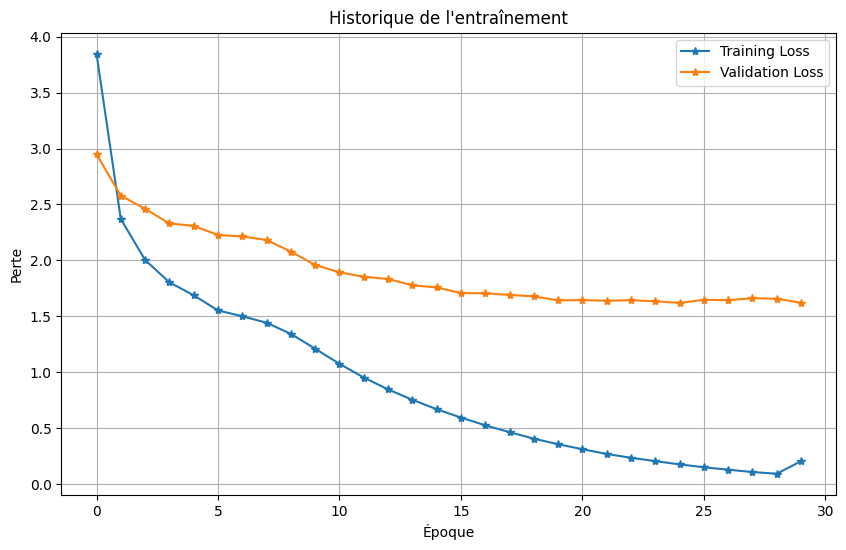

In [60]:
def show_history(history: History):
    """
    Affiche l'historique d'entra√Ænement du mod√®le dans un graphique

    Args :
        history : Objet contenant les pertes d'entra√Ænement et de
        validation de chaque √©tape d'entra√Ænement
    """
    # TODO

    # Cr√©ation de la figure
    plt.figure(figsize=(10, 6))

    # Trac√© de la perte d'entra√Ænement et de validation
    plt.plot(history.t_loss, label='Training Loss',marker='*')
    plt.plot(history.v_loss, label='Validation Loss',marker='*')

    # Ajout des titres et labels
    plt.title("Historique de l'entra√Ænement")
    plt.xlabel("√âpoque")
    plt.ylabel("Perte")
    plt.grid(True)
    plt.legend()

    # Affichage du graphique
    plt.show()

    # END TODO

show_history(history)

#### 8.2 Est-ce que le mod√®le semble √™tre en sur-apprentissage ? Pourquoi ? Que feriez-vous pour r√©soudre ce probl√®me ? (2 points)

### 8.2 Est-ce que le mod√®le semble √™tre en sur-apprentissage ?

Oui, le mod√®le montre des signes de sur-apprentissage : la perte d'entra√Ænement diminue tandis que la perte de validation stagne, indiquant une sp√©cialisation excessive sur les donn√©es d'entra√Ænement.

### Que feriez-vous pour r√©soudre ce probl√®me ?

1. **Augmenter le Dropout** : Augmenter le taux de dropout pour r√©duire la sp√©cialisation du mod√®le.
2. **Early Stopping** : Arr√™ter l'entra√Ænement lorsque la perte de validation cesse d‚Äôam√©liorer.
3. **R√©gularisation L2** : Ajouter une r√©gularisation pour √©viter que les poids deviennent trop grands.
4. **R√©duction de la Complexit√©** : Simplifier l'architecture du mod√®le si elle est trop complexe.

Ces solutions aideraient √† am√©liorer la g√©n√©ralisation du mod√®le.


#### 8.3 Lors de l'entra√Ænement, un mod√®le a √©t√© sauvegard√© √† chaque 10 √©poques. En vous basant sur le graphique de la fonction de perte durant l'entra√Ænement, choisissez la sauvegarde du mod√®le qui n'est pas en sur-apprentissage et chargez le pour l'√©valuation √† l'aide de la fonction `load` de la classe `Trainer`. Chargez √©galement le dernier mod√®le sauvegard√© pour comparer les r√©sultats. (1 point)

Nous d√©noterons le mod√®le arr√™t√© avant le sur-apprentissage comme √©tant : `stopped_model`

Nous d√©noterons le dernier mod√®le sauvegard√© comme √©tant : `last_model`

In [61]:
# TODO

stopped_model = Trainer.load(config=config, path='model_10.pt').to(DEVICE) # Chargement du mod√®le arr√™t√© avant le sur-apprentissage (vers l'√©poque 10)
last_model = Trainer.load(config=config, path='model_30.pt').to(DEVICE)# Chargement du dernier mod√®le sauvegard√© (fin de l'entra√Ænement)

# END TODO

<ipython-input-56-9cf23f255033>:198: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


### 9. √âvaluation (20 points)

#### 9.1 G√©n√©ration (10 points)
Maintenant que le mod√®le est entra√Æn√©, nous pouvons tester ses g√©n√©rations. Compl√©tez la fonction `generate` qui g√©n√®re, pour un lot de donn√©es, les pr√©dictions d'un mod√®le sur les concepts cl√©s de la phrase donn√©e en param√®tre.

In [62]:
def generate(model: Transformer, encoder_in: torch.tensor, bos_token_id: int, eos_token_id: int, max_length=MAX_LENGTH):
    """
    G√©n√®re les pr√©dictions d'un mod√®le pour des phrases donn√©es en param√®tre. Pour cela, vous devez
    initialiser un tenseur X contenant les jetons de d√©but de phrase (bos_token_id). Ensuite, ce
    tenseur sera pass√© comme entr√©e au d√©codeur avec `encoder_in` comme entr√©e √† l'encodeur. Le mod√®le
    g√©n√®rera un jeton en sortie qui sera le jeton le plus probable √©tant donn√© le jeton de d√©but de
    phrase et la s√©quence pass√©e dans l'encodeur. Ce jeton devra √™tre concat√©n√© au tenseur initial X
    pour former une s√©quence de deux jetons. Cette nouvelle s√©quence est ensuite r√©envoy√©e au d√©codeur.
    Un jeton en sortie sera g√©n√©r√© correspondant au jeton le plus probable √©tant donn√© la s√©quence de
    deux jetons et l'entr√©e de l'encodeur. Le nouveau jeton est concat√©n√© au tenseur X et l'op√©ration
    est r√©p√©t√©e jusqu'√† ce que le d√©codeur g√©n√®re le jeton de fin de phrase.

    Args :
        model : Mod√®le effectuant les pr√©dictions

        inputs : Tenseur contenant les phrases d'entr√©es sous forme d'indices de jetons

        bos_token_id : Jeton d'entr√©e du tokenizer utilis√© pour initialiser le tenseur de g√©n√©ration

        eos_token_id : Jeton de fin du tokenizer utilis√© pour d√©tecter la fin d'une s√©quence

        max_length : Nombre maximal de jetons qui doivent √™tre g√©n√©r√©s par le mod√®le

    Returns :
    G√©n√©ration du mod√®le de chacune des phrases en entr√©e
    """
    # TODO
    model.eval()

    current_batch_size = encoder_in.size(0)

    # Initialisation de la s√©quence g√©n√©r√©e avec le jeton de d√©but
    generated_sequence = torch.full((current_batch_size, 1), bos_token_id, dtype=torch.long, device=DEVICE)

    # Indicateur de s√©quences termin√©es
    finished_sequences = torch.zeros(current_batch_size, dtype=torch.bool, device=DEVICE)

    for _ in range(max_length):
        # Appel du mod√®le pour g√©n√©rer la sortie
        output = model(encoder_in, generated_sequence)

        # Extraction des jetons pr√©vus (dernier jeton de generated_sequence)
        next_token = output[:, -1, :].argmax(dim=-1, keepdim=True)

        # Mise √† jour des s√©quences termin√©es
        finished_sequences |= (next_token.squeeze(1) == eos_token_id)

        # Assignation du jeton de fin de phrase aux s√©quences termin√©es
        next_token[finished_sequences] = eos_token_id

        # Concat√©nation des nouveaux jetons g√©n√©r√©s
        generated_sequence = torch.cat([generated_sequence, next_token], dim=1)

        # Arr√™t si toutes les s√©quences sont termin√©es
        if finished_sequences.all():
            break

    return generated_sequence

    # END TODO

In [63]:
def get_predictions(model, tokenizer):

    bos_token_id = tokenizer("")['input_ids'][0]
    eos_token_id = tokenizer("")['input_ids'][1]

    sentences = []
    predictions = []
    ground_truth = []
    for test_data in test_loader:

        inputs = test_data['encoder_in']
        result = generate(model, inputs, bos_token_id, eos_token_id)

        sentences.extend(tokenizer.batch_decode(test_data['encoder_in'], skip_special_tokens=True))
        ground_truth.extend(tokenizer.batch_decode(test_data['decoder_out'], skip_special_tokens=True))
        predictions.extend(tokenizer.batch_decode(result, skip_special_tokens=True))

    return sentences, ground_truth, predictions

sentences_stopped, ground_truth_stopped, predictions_stopped = get_predictions(stopped_model, tokenizer)
sentences_last, ground_truth_last, predictions_last = get_predictions(last_model, tokenizer)

In [64]:
predictions_stopped = pd.DataFrame({'sentences': sentences_stopped, 'ground_truth': ground_truth_stopped, 'predictions': predictions_stopped})
predictions_last = pd.DataFrame({'sentences': sentences_last, 'ground_truth': ground_truth_last, 'predictions': predictions_last})

In [65]:
predictions_stopped.to_csv('predictions_stopped.csv', index=False)
predictions_last.to_csv('predictions_last.csv', index=False)

In [66]:
predictions_stopped.head(20)

sentences  \
0   two elephants standing next to each other in t...   
1   A big elephant that is standing there quietly ...   
2                        love the color of this dress   
3                 i just love the colors in her dress   
4            love the colors and print on this dress.   
5                      harvesting wheat in the fields   
6                   wheat ready to harvest in a field   
7               a farmer harvests wheat at the fields   
8                     a bee pollinating a pink flower   
9                 bee pollinate the flowers in yellow   
10             this honey bee is pollinating flowers.   
11           a group of students celebrate graduation   
12    students celebrate on the lawn after graduation   
13  happy female students celebrating their gradua...   
14           a bathroom with a brown wall and counter   
15  A well lit bathroom with white walls and beige...   
16              A giraffe is standing inside of a pen   
17         these are three giraffes standing in a pen   
18  Four giraffe standing next to each other in a ...   
19            A dog that is laying down under a desk.   

                            ground_truth                     predictions  
0             ['elephant'' pen'' stand']    ['elephant'' stand'' stand']  
1             ['elephant'' pen'' stand']    ['elephant'' stand'' stand']  
2               ['color'' dress'' love']      ['airport'' plate'' take']  
3               ['color'' dress'' love']       ['airport'' land'' take']  
4               ['color'' dress'' love']     ['airport'' plate'' table']  
5            ['field'' harvest'' wheat']        ['eat'' student'' work']  
6            ['field'' harvest'' wheat']       ['field'' field'' field']  
7            ['field'' harvest'' wheat']       ['elephant'' eat'' work']  
8           ['bee'' flower'' pollinate']    ['flower'' flower'' flower']  
9           ['bee'' flower'' pollinate']    ['flower'' flower'' flower']  
10          ['bee'' flower'' pollinate']    ['flower'' flower'' flower']  
11  ['celebrate'' graduation'' student']    ['student'' student'' work']  
12  ['celebrate'' graduation'' student']    ['student'' student'' work']  
13  ['celebrate'' graduation'' student']    ['student'' student'' work']  
14         ['bathroom'' counter'' wall']      ['bathroom'' wall'' wall']  
15         ['bathroom'' counter'' wall']  ['bathroom'' bathroom'' wall']  
16             ['giraffe'' pen'' stand']         ['eat'' stand'' stand']  
17             ['giraffe'' pen'' stand']      ['airplane'' fly'' stand']  
18             ['giraffe'' pen'' stand']    ['elephant'' stand'' stand']  
19                  ['desk'' dog'' lay']             ['dog'' dog'' dog']

#### 9.2 √âvaluation naive de la g√©n√©ration (1 point)
Nous allons d'abord mesurer l'efficacit√© de notre mod√®le pour extraire les concepts √† l'aide d'une m√©trique de correspondance exacte (exact match). Pour cela, nous allons mesurer le nombre de g√©n√©rations (`predictions`) qui sont identiques √† celles qui sont attendues dans l'ensemble de r√©f√©rence (`ground truth`) et diviser le tout par le nombre totaux d'√©l√©ments dans l'ensemble de r√©f√©rence. Ainsi, la m√©trique EM (exact match) √©quivaut √† :

$$\text{EM} = \frac{\text{Nombre d'√©l√©ments identiques entre l'ensemble g√©n√©r√© et l'ensemble de r√©f√©rence}}{\text{Nombre d'√©l√©ments dans l'ensemble de r√©f√©rence}}$$

In [67]:
def compute_em_score(data):
    """
    √âvalue la m√©trique EM du mod√®le en utilisant la m√©trique BLEU
    Args :
        - data : DataFrame contenant les colonnes predictions et ground_truth

    Returns :
    La m√©trique EM du mod√®le en pourcentage
    """
    # TODO
    # Comptage du nombre de correspondances exactes entre les pr√©dictions et le ground truth
    exact_matches = (data['predictions'] == data['ground_truth']).sum()

    # Calcul de la m√©trique EM en divisant le nombre de correspondances exactes par le nombre total d'√©l√©ments
    em_score = (exact_matches / len(data)) * 100

    return em_score
    # END TODO

print(f"La m√©trique EM du mod√®le arr√™t√© selon la fonction de perte est {compute_em_score(predictions_stopped):.2f} %")
print(f"La m√©trique EM du dernier mod√®le est {compute_em_score(predictions_last):.2f} %")

La m√©trique EM du mod√®le arr√™t√© selon la fonction de perte est 0.40 %
La m√©trique EM du dernier mod√®le est 9.60 %


#### 9.3 Quels probl√®mes voyez-vous avec cette mani√®re de calculer la performance du mod√®le ? (1 point)

### Limites de la m√©thode EM pour √©valuer la performance du mod√®le

La m√©thode EM (Exact Match) pr√©sente des limites significatives pour √©valuer la performance du mod√®le :

- **Rigidit√© de la correspondance exacte** : La m√©thode est trop stricte, car elle consid√®re toute variation entre la pr√©diction et la r√©f√©rence comme une erreur compl√®te, m√™me si les r√©ponses sont conceptuellement correctes.
- **Absence de flexibilit√© pour les synonymes** : EM ne tient pas compte des synonymes ou des reformulations acceptables, ce qui peut entra√Æner une sous-√©valuation de la performance lorsque les r√©ponses sont correctes mais exprim√©es diff√©remment.
- **M√©triques alternatives** : Des m√©triques comme BLEU ou ROUGE seraient mieux adapt√©es. Elles permettent des variations dans la formulation tout en mesurant la similarit√© de contenu, offrant ainsi une √©valuation plus nuanc√©e et r√©aliste de la qualit√© des pr√©dictions du mod√®le.


#### 9.4 M√©trique BLEU (4 points)
Pour pallier √† ce probl√®me, la m√©trique BLEU sera utilis√©e puisqu'elle est bas√©e sur le nombre de n-gramme qui sont pr√©sents dans les pr√©dictions et les s√©quences voulues. La formule est donn√©e ci-dessous :
$$BLEU = BP * exp \Big( \sum_{n=1}^{N} w_n \log p_n \Big)$$

Consid√©rant que $r$ est la phrase de r√©f√©rence (voulue) et $c$ la phrase g√©n√©r√©e (candidate), $p_n$ est la pr√©cision modifi√©e pour le n-gramme (correspondant au ratio de la fr√©quence maximum du n-gramme dans la phrase de r√©f√©rence par la fr√©quence du n-gramme):
$$p_n = \frac{\sum_{\text{n-gramme} \in c} \min\Big( \max_{r} \text{Count$_r$(n-gramme)}, \text{Count$_c$(n-gramme)} \Big)}{\sum_{\text{n-gramme} \in c} \text{Count$_c$(n-gramme)}}$$

Notez que le $\max_{r}$ est pr√©sent ici car BLEU accepte plusieurs phrases de r√©f√©rence pour une m√™me phrase g√©n√©r√©e. Cependant, dans notre cas, il y a seulement une seule phrase de r√©f√©rence.

Posons ensuite $|r|$ comme le nombre de mots dans la phrase cible et $|c|$ comme le nombre de mots dans la phrase pr√©dite. Si $c>r$, alors BP vaut 1. Sinon $$BP = exp(1 - \frac{|r|}{|c|})$$

Les valeurs des poids $w_n$ est ce qui donne les diff√©rentes variations de la m√©trique BLEU. Dans notre cas, la m√©trique BLEU-1 sera utilis√©e. La valeur maximale du score BLEU est 1 et la valeur minimale est 0.

Vous pouvez utiliser la fonction `sentence_bleu` de `nltk` pour calculer votre score BLEU. N'oubliez pas d'enlever les apostrophes et les crochets des g√©n√©rations avant votre calcul.

In [68]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def compute_bleu(predictions):
    """
    √âvalue la pr√©cision du mod√®le en utilisant la m√©trique BLEU
    Args :
        - data : DataFrame contenant les colonnes predictions et ground_truth

    Returns :
        La moyenne du score BLEU
    """
    weights = (1, 0, 0, 0) # Use Bleu-1
    # TODO
    bleu_scores = []
    smoothing_fn = SmoothingFunction().method1  # Fonction de lissage

    for _, row in predictions.iterrows():
        # Nettoyage les pr√©dictions et les r√©f√©rences en retirant les crochets et les apostrophes
        prediction = re.sub(r"[\[\]']", "", row["predictions"]).split()
        reference = [re.sub(r"[\[\]']", "", row["ground_truth"]).split()]

        # Calcul du score BLEU pour la phrase actuelle avec la fonction de lissage
        bleu_score = sentence_bleu(reference, prediction, weights=weights, smoothing_function=smoothing_fn)
        bleu_scores.append(bleu_score)

    # Retourne la moyenne des scores BLEU
    return sum(bleu_scores) / len(bleu_scores)


    # END TODO

print(f"Le score BLEU du mod√®le arr√™t√© selon la fonction de perte est {compute_bleu(predictions_stopped):.2f}")
print(f"Le score BLEU du dernier mod√®le est {compute_bleu(predictions_last):.2f}.")

Le score BLEU du mod√®le arr√™t√© selon la fonction de perte est 0.30
Le score BLEU du dernier mod√®le est 0.58.


#### 9.5 Quel est l'avantage d'utiliser la m√©trique BLEU par rapport √† la m√©trique EM bas√©e sur la comparaison de cha√Æne de caract√®res ? (2 points)

L‚Äôavantage d‚Äôutiliser la m√©trique BLEU par rapport √† la m√©trique EM est qu‚Äôelle permet de capturer les correspondances partielles (n-grammes) entre la pr√©diction et la r√©f√©rence, ce qui la rend plus flexible et tol√©rante aux petites variations. Contrairement √† la m√©trique EM, qui exige une correspondance exacte, la BLEU peut √©valuer la similarit√© m√™me si la pr√©diction n‚Äôest pas identique mot pour mot √† la r√©f√©rence, ce qui est particuli√®rement utile pour les t√¢ches de g√©n√©ration de texte.


#### 9.6 Que remarquez-vous par rapport aux performances du mod√®le arr√™t√© avant le sur-apprentissage selon la fonction de perte versus celles du dernier mod√®le ? Quelles sont les raisons qui peuvent expliquer cela ? (2 points)

Le dernier mod√®le montre un score BLEU sup√©rieur √† celui du mod√®le arr√™t√© avant le sur-apprentissage, indiquant de meilleures performances de g√©n√©ration. Cela peut s'expliquer par le fait que le dernier mod√®le a eu plus d'√©poques pour apprendre les relations complexes dans les donn√©es d'entra√Ænement, ce qui am√©liore la pr√©cision des pr√©dictions. Cependant, ce mod√®le risque √©galement de m√©moriser davantage les donn√©es d'entra√Ænement, ce qui pourrait r√©duire sa capacit√© de g√©n√©ralisation sur de nouvelles donn√©es. Le mod√®le arr√™t√© avant le sur-apprentissage pourrait, quant √† lui, √™tre moins performant sur les donn√©es d'entra√Ænement mais mieux g√©n√©raliser sur des exemples non vus.


### 10. Exploration (4 points)

#### 10.1 Explorez les g√©n√©rations actuelles de votre mod√®le et ressortez 2 probl√®mes que le mod√®le a lors de la g√©n√©ration qui font diminuer son score BLEU. (2 points)

1. **R√©p√©titions de mots ou de phrases** : Le mod√®le a tendance √† r√©p√©ter certains mots ou s√©quences de mots lors de la g√©n√©ration. Ces r√©p√©titions, qui ne sont g√©n√©ralement pas pr√©sentes dans les s√©quences de r√©f√©rence, entra√Ænent une baisse du score BLEU car elles r√©duisent la pr√©cision n-grammes.

2. **Mauvais choix de mots-cl√©s ou manque de pr√©cision contextuelle** : Le mod√®le utilise parfois des termes synonymes ou contextuellement similaires mais qui ne correspondent pas exactement aux mots de la r√©f√©rence. Ces diff√©rences subtiles dans le vocabulaire et le contexte diminuent la correspondance exacte avec la phrase cible, affectant ainsi le score BLEU.


#### 10.2 Am√©lioration des m√©triques (2 points)
L'exemple ci-dessous montre 2 g√©n√©rations de 2 mod√®les pour la phrase "A dog is eating a flower". Bien que la g√©n√©ration du mod√®le 2 soit beaucoup plus proche s√©mantiquement de la r√©f√©rence que celle du mod√®le 1, la m√©trique BLEU retourne 0.0 dans les deux cas. En effet, puisque la m√©trique ne compare que les n-grammes, la pr√©diction du mod√®le 2 est quand m√™me de 0, car aucun des mots dans la pr√©diction ne sont pr√©sents dans les concepts voulus.

In [69]:
ground_truth = "['dog' 'eat' 'flower']"

prediction_1 = "['car' 'hit' 'person']"
preds = pd.DataFrame({'predictions': [prediction_1], 'ground_truth': [ground_truth]})

print(f"Concepts voulus {ground_truth}")
print(f"Pr√©diction du mod√®le 1 : {prediction_1}")
print(f"BLEU : {compute_bleu(preds):.2f}")

prediction_2 = "['animal' 'eating' 'plant']"
preds = pd.DataFrame({'predictions': [prediction_2], 'ground_truth': [ground_truth]})

print(f"Pr√©diction du mod√®le 2 : {prediction_2}")
print(f"BLEU : {compute_bleu(preds):.2f}")

Concepts voulus ['dog' 'eat' 'flower']
Pr√©diction du mod√®le 1 : ['car' 'hit' 'person']
BLEU : 0.00
Pr√©diction du mod√®le 2 : ['animal' 'eating' 'plant']
BLEU : 0.00


Proposez (sans l'impl√©menter) une meilleure m√©trique pour √©valuer les mod√®les face √† cette t√¢che d'extraction qui donnerait un score plus √©lev√© √† la pr√©diction du mod√®le 2.

Cet exemple illustre une limitation importante de la m√©trique BLEU pour √©valuer les concepts g√©n√©r√©s par le mod√®le, en particulier pour les t√¢ches o√π des termes synonymes ou proches s√©mantiquement de ceux attendus peuvent √™tre corrects. Dans le cas de la g√©n√©ration, bien que "animal", "eating", et "plant" soient s√©mantiquement plus proches de "dog", "eat", et "flower" que les mots de la premi√®re pr√©diction, la m√©trique BLEU reste √† 0.0 car elle ne d√©tecte aucune correspondance exacte de n-grammes entre la pr√©diction et la r√©f√©rence.

**Am√©lioration possible :**
Pour mieux refl√©ter la similarit√© s√©mantique, il serait avantageux d‚Äôutiliser une m√©trique qui tient compte des similarit√©s de sens, comme les embeddings de mots pour calculer des distances cosinus entre les mots, ou des m√©triques comme le score ROUGE ou METEOR, qui sont moins strictes que la m√©trique BLEU en termes de correspondances exactes des n-grammes. Cela permettrait de mieux √©valuer les g√©n√©ralisations du mod√®le m√™me si elles ne sont pas exactement identiques aux concepts attendus.


## Livrables
Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les num√©ros de questions avec vos r√©ponses dans le pdf gr√¢ce √† l'outil que fournit Gradescope.


## √âvaluation
Votre TP sera √©valu√© selon les crit√®res suivants :
1. Ex√©cution correcte du code et obtention des sorties attendues
2. R√©ponses correctes aux questions d'analyse
3. Qualit√© du code (noms significatifs, structure, performance, gestion d‚Äôexception, etc.)
4. Commentaires clairs et informatifs